# Data analysis for our study on the transparency and open science standards in the policies of medical and health science journals

The protocol and details of our study is openly availble via the OSF [here](https://osf.io/h2xud/).

In [1]:
# import libraries required for analysis 
import numpy as np 
import pandas as pd
from pylab import savefig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data 
df1=pd.read_csv("TOP_medj_totals.csv",thousands=',')
df1.head()

,Journal,year,TOP_8,grand_total,COI_total,Citation,Data transparency,Analytic methods (Code),Materials,Design & analysis,...,Analysis prereg,Replication,TOP signatory,Reg reports,OS badges,extra_total,COI1,COI2,COI3,COI4
0,Nat.Med.,2021,14,15,4,2,2,3,2,2,...,1,1,1,0,0,1,1,1,1,1
1,Nat.Neurosci.,2021,14,15,4,2,2,3,2,2,...,1,1,1,0,0,1,1,1,1,1
2,Nat.Genet.,2021,14,15,4,2,2,3,2,2,...,1,1,1,0,0,1,1,1,1,1
3,Cell,2021,13,14,3,2,2,2,2,2,...,1,1,1,0,0,1,1,1,1,0
4,Cell,2020,13,14,3,2,2,3,2,2,...,1,0,1,0,0,1,1,1,1,0


# Analysis of total score for journal policies (TOP score + 3 extra items)

In [3]:
# descriptive stats for grand total score (TOP + extras), out of 29 
df1.groupby('year', as_index=False).agg({"grand_total": "describe"})

year grand_total                                            
              count  mean      std  min   25%  50%    75%   max
0  2020        20.0  7.15  5.23425  0.0  2.00  6.5  13.00  14.0
1  2021        20.0  8.65  5.18373  0.0  4.75  8.0  13.25  15.0

In [4]:
table=pd.pivot_table(df1,index='Journal',columns='year',values='grand_total',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,4,4,0
Blood,7,7,0
Cell,14,14,0
Circulation,9,9,0
Cochrane,2,3,1
Eur.Heart J.,1,7,6
Gastroenterol,6,12,6
J.Am.Coll.Cardiol.,0,7,7
J.Clin Oncol.,6,0,-6


In [5]:
table=pd.pivot_table(df1,index='Journal',columns='year',values='extra_total',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,1,1,0
Blood,0,0,0
Cell,1,1,0
Circulation,1,1,0
Cochrane,1,2,1
Eur.Heart J.,0,0,0
Gastroenterol,0,0,0
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


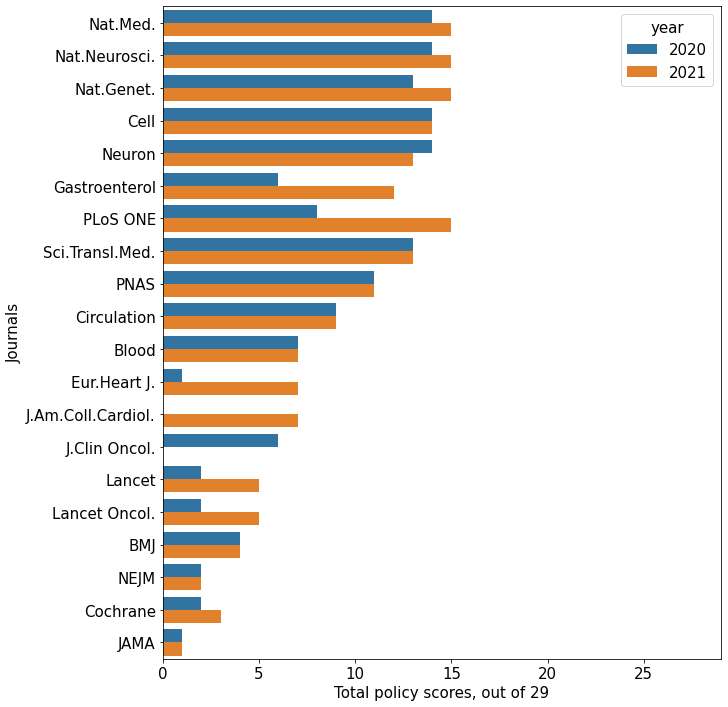

In [20]:
# plotting the grand total score (TOP 8 + 3 extras) for 2020 & 2021, score out of 29 

plt.figure(figsize=(10,12))
sns.set_color_codes("colorblind")
ax = sns.barplot(data=df, x="grand_total", y="Journal", hue="year")
plt.xlabel('Total policy scores, out of 29', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Journals', fontsize=15)
plt.legend(title='year', title_fontsize=15, fontsize=15)
degrees=0
plt.yticks(fontsize=15, rotation=degrees)
ax.set(xlim=(0, 29))

plt.savefig("fig_totalTOP_20-21.png", dpi=600)

# Analysis of TOP guidelines, 8 standards 

In [5]:
# descriptive stats for all variables - due to volume of data, only showing in full for total TOP score, out of 24 
df.groupby('year').describe()

TOP_8                                            grand_total        ...  \
     count  mean       std  min  25%  50%   75%   max       count  mean  ...   
year                                                                     ...   
2020  20.0  6.60  4.913997  0.0  2.0  6.0  12.0  13.0        20.0  7.15  ...   
2021  20.0  7.95  4.839258  0.0  4.5  7.5  12.0  14.0        20.0  8.65  ...   

     COI3       COI4                                           
      75%  max count  mean       std  min  25%  50%  75%  max  
year                                                           
2020  1.0  1.0  20.0  0.90  0.307794  0.0  1.0  1.0  1.0  1.0  
2021  1.0  1.0  20.0  0.95  0.223607  0.0  1.0  1.0  1.0  1.0  

[2 rows x 152 columns]

In [6]:
table=pd.pivot_table(df1,index='Journal',columns='year',values='TOP_8',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,3,3,0
Blood,7,7,0
Cell,13,13,0
Circulation,8,8,0
Cochrane,1,1,0
Eur.Heart J.,1,7,6
Gastroenterol,6,12,6
J.Am.Coll.Cardiol.,0,7,7
J.Clin Oncol.,6,0,-6


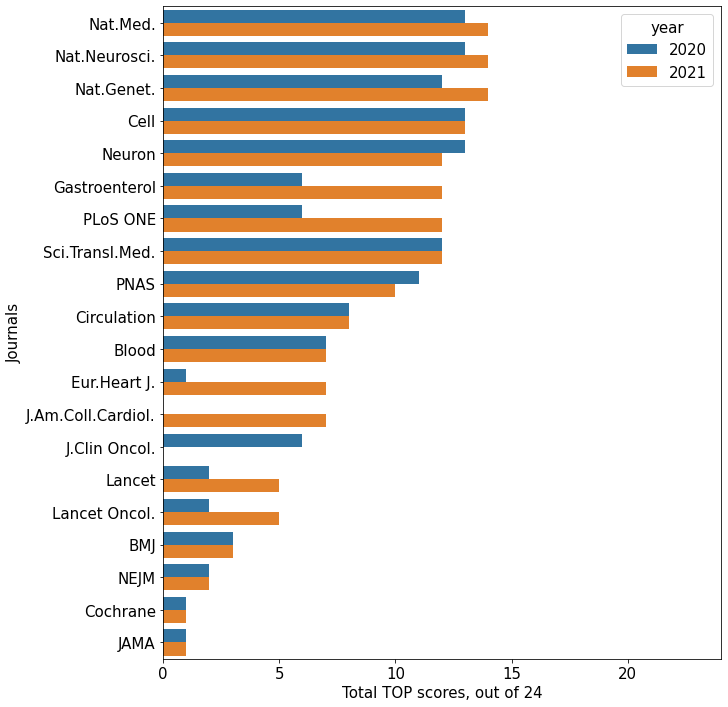

In [7]:
# plotting the total TOP score for 2020 & 2021

plt.figure(figsize=(10,12))
sns.set_color_codes("colorblind")
ax = sns.barplot(data=df1, x="TOP_8", y="Journal", hue="year")
plt.xlabel('Total TOP scores, out of 24', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Journals', fontsize=15)
plt.legend(title='year', title_fontsize=15, fontsize=15)
degrees=0
plt.yticks(fontsize=15, rotation=degrees)
ax.set(xlim=(0, 24))

plt.savefig("fig_TOP_20-21.png", dpi=600)

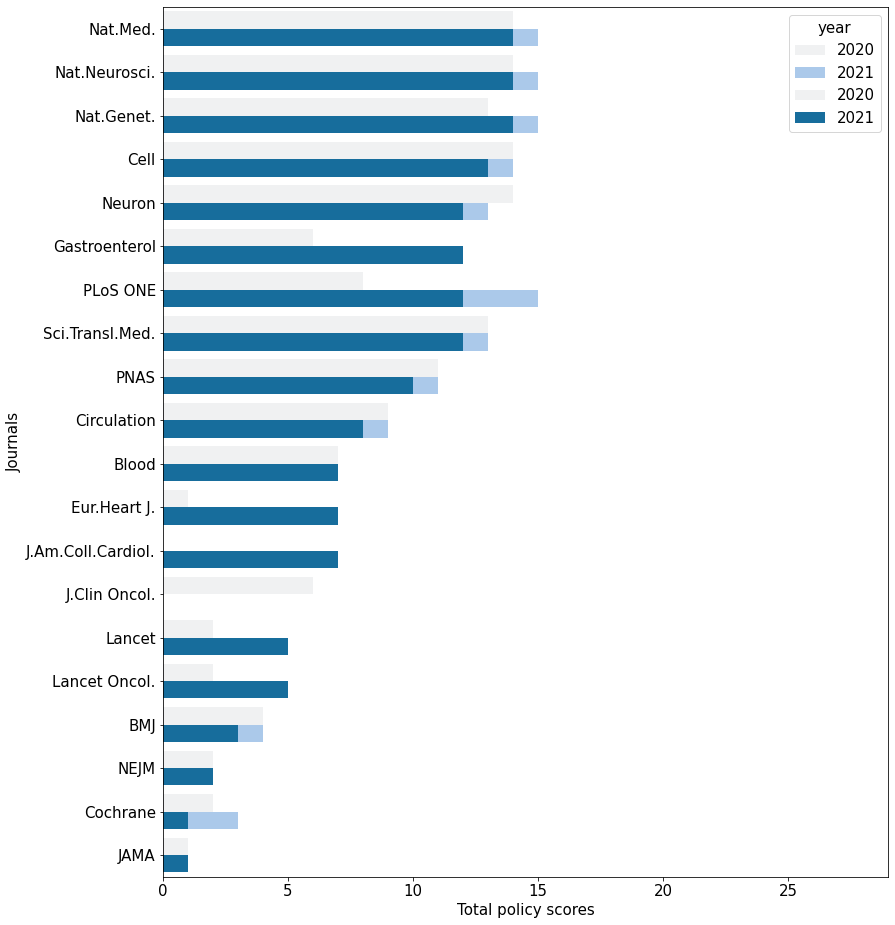

In [26]:
f, ax = plt.subplots(figsize=(13, 16))

# Plot grand total
sns.set_color_codes("pastel")
sns.barplot(data=df, x="grand_total", y="Journal", hue="year", color="b")

# Plot TOP 8 standards
sns.set_color_codes("colorblind")
sns.barplot(data=df, x="TOP_8", y="Journal", hue="year", color="b")

# Add a legend and informative axis label
ax.set(xlim=(0, 29))
degrees=0
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=degrees)
plt.ylabel('Journals', fontsize=15)
plt.xlabel("Total policy scores", fontsize=15)
plt.legend(title='year', title_fontsize=15, fontsize=15)

plt.savefig("TOPcombined_20-21.png", dpi=600)

# Descriptive stats for each measure of TOP standards 

In [9]:
# Citation summary  
df1.groupby('year', as_index=False).agg({"Citation": "describe"})

year Citation                                          
           count  mean       std  min  25%  50%   75%  max
0  2020     20.0  0.80  0.833509  0.0  0.0  1.0  1.25  2.0
1  2021     20.0  0.95  0.944513  0.0  0.0  1.0  2.00  2.0

In [10]:
# difference in citation scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Citation',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,2,0,-2
Cell,2,2,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,2,2
Gastroenterol,2,2,0
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [11]:
# Data transparency summary  
df1.groupby('year', as_index=False).agg({"Data transparency": "describe"})

year Data transparency                                        
                    count mean       std  min  25%  50%  75%  max
0  2020              20.0  1.2  0.894427  0.0  0.0  1.5  2.0  2.0
1  2021              20.0  1.4  0.753937  0.0  1.0  2.0  2.0  2.0

In [12]:
# difference in Data transparency scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Data transparency',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,1,1,0
Blood,2,2,0
Cell,2,2,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,1,1
Gastroenterol,2,2,0
J.Am.Coll.Cardiol.,0,2,2
J.Clin Oncol.,1,0,-1


In [14]:
# Analystic methods (code) summary  
df1.groupby('year', as_index=False).agg({"Analytic methods (Code)": "describe"})

year Analytic methods (Code)                                         
                          count  mean       std  min  25%  50%  75%  max
0  2020                    20.0  1.15  1.225819  0.0  0.0  1.0  2.0  3.0
1  2021                    20.0  1.35  1.136708  0.0  0.0  2.0  2.0  3.0

In [15]:
# difference in Analystic methods (code) scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Analytic methods (Code)',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,1,2,1
Cell,3,2,-1
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,1,1
Gastroenterol,0,2,2
J.Am.Coll.Cardiol.,0,2,2
J.Clin Oncol.,2,0,-2


In [16]:
# Materials summary  
df1.groupby('year', as_index=False).agg({"Materials": "describe"})

year Materials                                          
            count  mean       std  min   25%  50%  75%  max
0  2020      20.0  1.05  0.944513  0.0  0.00  1.0  2.0  2.0
1  2021      20.0  1.30  0.864505  0.0  0.75  2.0  2.0  2.0

In [17]:
# difference in Materials scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Materials',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,2,2,0
Cell,2,2,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,1,1
Gastroenterol,1,2,1
J.Am.Coll.Cardiol.,0,2,2
J.Clin Oncol.,2,0,-2


In [18]:
# Design & analysis summary  
df1.groupby('year', as_index=False).agg({"Design & analysis": "describe"})

year Design & analysis                                         
                    count  mean       std  min  25%  50%  75%  max
0  2020              20.0  1.20  0.615587  0.0  1.0  1.0  2.0  2.0
1  2021              20.0  1.35  0.587143  0.0  1.0  1.0  2.0  2.0

In [19]:
# difference in Design & analysis scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Design & analysis',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,2,2,0
Blood,0,1,1
Cell,2,2,0
Circulation,1,1,0
Cochrane,1,1,0
Eur.Heart J.,1,1,0
Gastroenterol,1,1,0
J.Am.Coll.Cardiol.,0,1,1
J.Clin Oncol.,1,0,-1


In [20]:
# Study prereg summary  
df1.groupby('year', as_index=False).agg({"Study prereg": "describe"})

year Study prereg                                        
               count mean       std  min  25%  50%  75%  max
0  2020         20.0  0.5  0.512989  0.0  0.0  0.5  1.0  1.0
1  2021         20.0  0.6  0.502625  0.0  0.0  1.0  1.0  1.0

In [21]:
# difference in Study prereg scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Study prereg',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,0,0,0
Cell,1,1,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,1,1
Gastroenterol,0,1,1
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [22]:
# Analysis prereg summary  
df1.groupby('year', as_index=False).agg({"Analysis prereg": "describe"})

year Analysis prereg                                         
                  count  mean       std  min  25%  50%  75%  max
0  2020            20.0  0.40  0.502625  0.0  0.0  0.0  1.0  1.0
1  2021            20.0  0.45  0.510418  0.0  0.0  0.0  1.0  1.0

In [23]:
# difference in Analysis prereg scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Analysis prereg',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,0,0,0
Cell,1,1,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,0,0
Gastroenterol,0,1,1
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [24]:
# Replication summary  
df1.groupby('year', as_index=False).agg({"Replication": "describe"})

year Replication                                         
              count  mean       std  min  25%  50%  75%  max
0  2020        20.0  0.30  0.470162  0.0  0.0  0.0  1.0  1.0
1  2021        20.0  0.55  0.759155  0.0  0.0  0.0  1.0  3.0

In [25]:
# difference in Replication scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Replication',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,0,0,0
Cell,0,1,1
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,0,0
Gastroenterol,0,1,1
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


# Analysis of COI scores from the International Committee of Medical Journal Editors (ICMJE) disclosure form 

In [7]:
# descriptive stats for COI total score, out of 4
df.groupby('year', as_index=False).agg({"COI_total": "describe"})

year COI_total                                         
            count  mean       std  min  25%  50%  75%  max
0  2020      20.0  3.85  0.366348  3.0  4.0  4.0  4.0  4.0
1  2021      20.0  3.95  0.223607  3.0  4.0  4.0  4.0  4.0

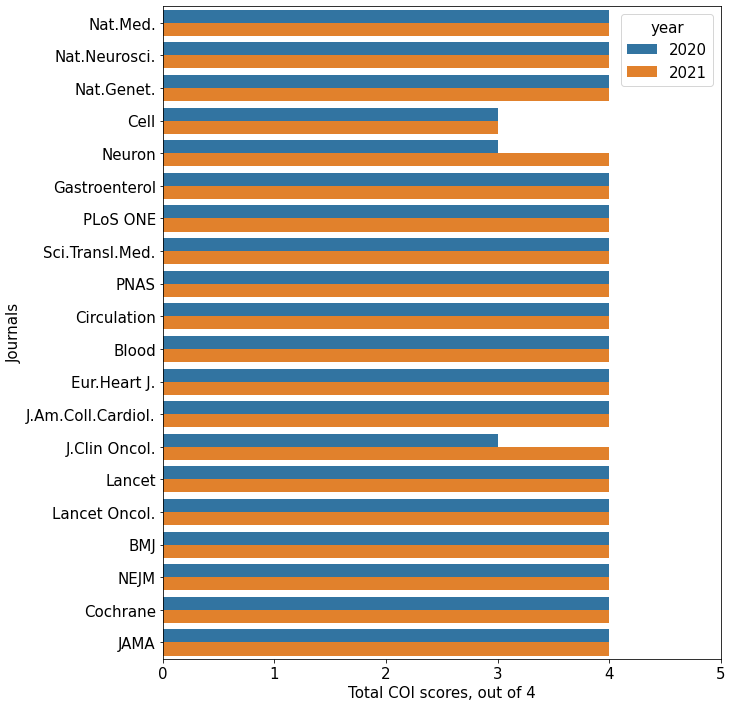

In [22]:
# plotting the total COI score for 2020 & 2021, out of 4 points 

plt.figure(figsize=(10,12))
sns.set_color_codes("colorblind")
ax = sns.barplot(data=df, x="COI_total", y="Journal", hue="year")
plt.xlabel('Total COI scores, out of 4', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Journals', fontsize=15)
plt.legend(title='year', title_fontsize=15, fontsize=15)
degrees=0
plt.yticks(fontsize=15, rotation=degrees)
ax.set(xlim=(0, 5))

plt.savefig("fig_COI_20-21.png", dpi=600)

# Figures for 2020 scores

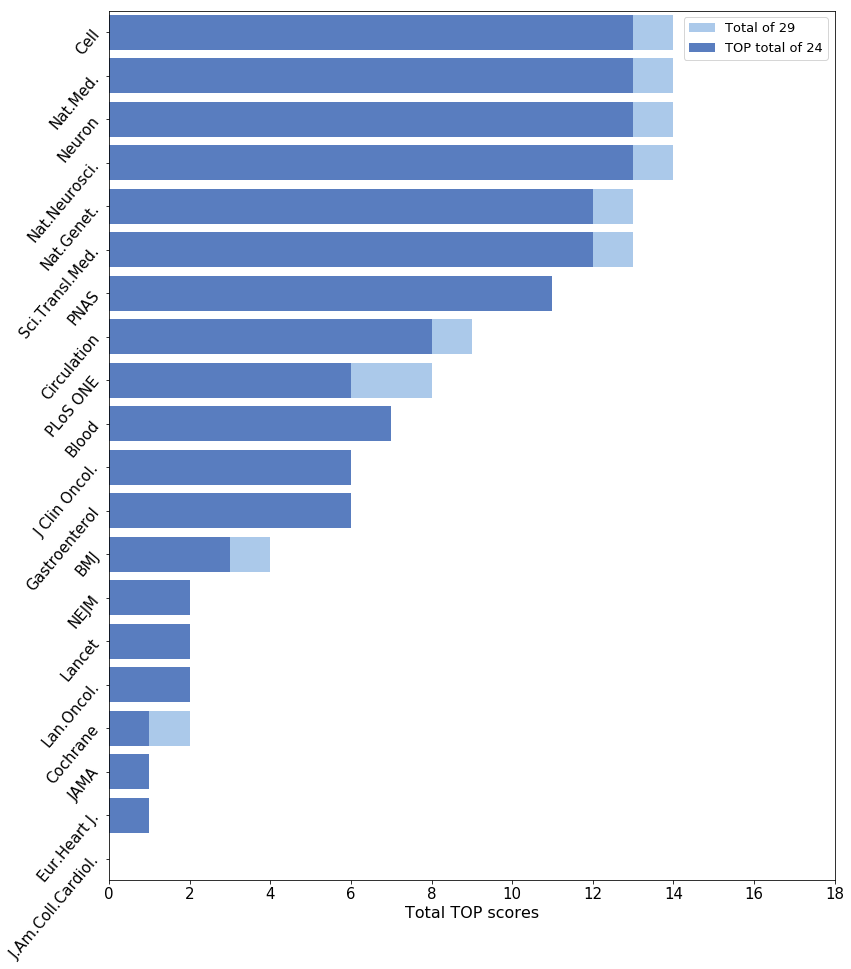

In [8]:
# for 2020: plotting the grand total score (TOP 8 + 3 extras), out of a possible 29 points 

f, ax = plt.subplots(figsize=(13, 16))

# Plot grand total
sns.set_color_codes("pastel")
sns.barplot(x="grand_total", y="Journal", data=df,
            label="Total of 29", color="b")

# Plot TOP 8 standards
sns.set_color_codes("muted")
sns.barplot(x="TOP_8", y="Journal", data=df,
            label="TOP total of 24", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True, fontsize=13)
ax.set(xlim=(0, 18), 
       ylabel="")

degrees=50
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=degrees)
plt.xlabel("Total TOP scores", fontsize=16)

plt.savefig("fig1_totalTOPcombined.png", dpi=600)

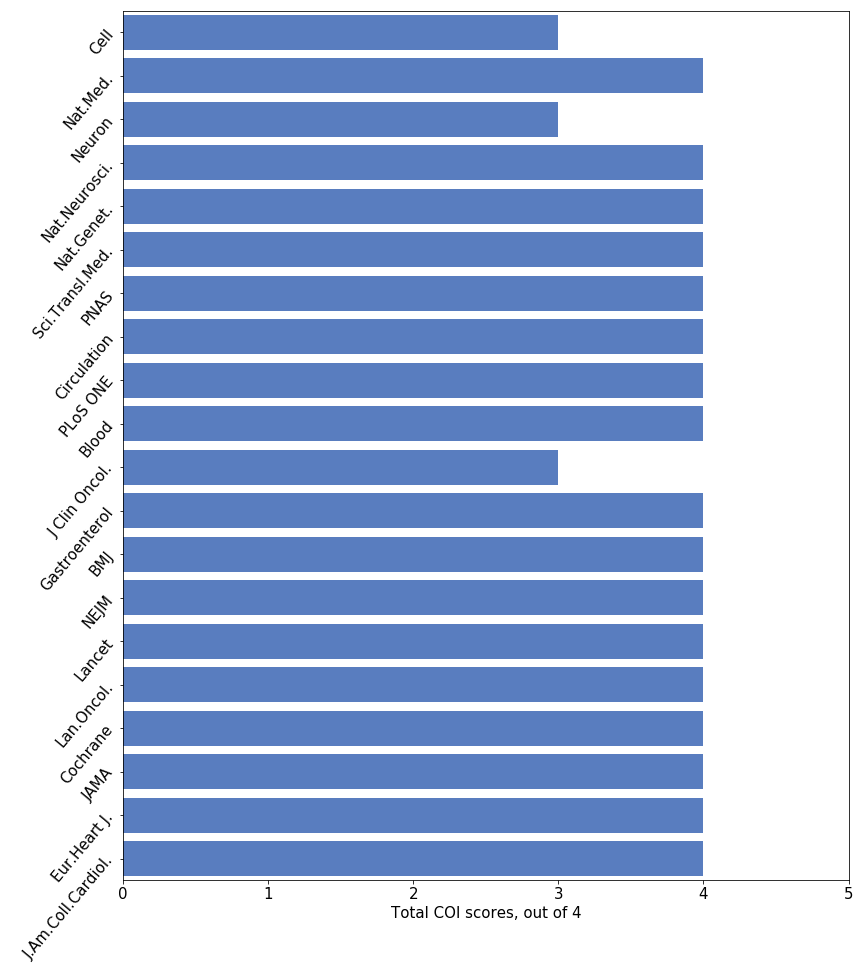

In [9]:
# plotting the total COI scores for 2020, score out of 4 

plt.figure(figsize=(13,16))
sns.set_color_codes("muted")
ax = sns.barplot(data=df, x="COI_total", y="Journal", color="b")
plt.xlabel('Total COI scores, out of 4', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(' ')
degrees=50
plt.yticks(fontsize=15, rotation=degrees)
ax.set(xlim=(0, 5))

plt.savefig("fig2_COI.png", dpi=600)

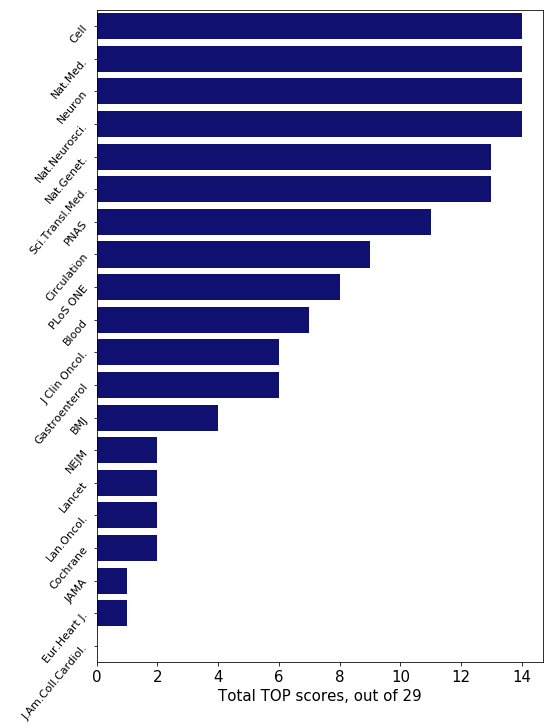

In [13]:
# plotting the grand total score (TOP 8 + 3 extras) for 2020, total out of 29 

plt.figure(figsize=(8,12))
ax = sns.barplot(data=df, x="grand_total", y="Journal", color="navy")
plt.xlabel('Total TOP scores, out of 29', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(' ')
degrees=50
plt.yticks(fontsize=11, rotation=degrees)

plt.savefig("fig1_totalTOP.png", dpi=600)